PCA, Sparse PCA, and LSA comparison on Original Corpus
Explained variance for PCA on Original Corpus: [0.01633569 0.00919562]


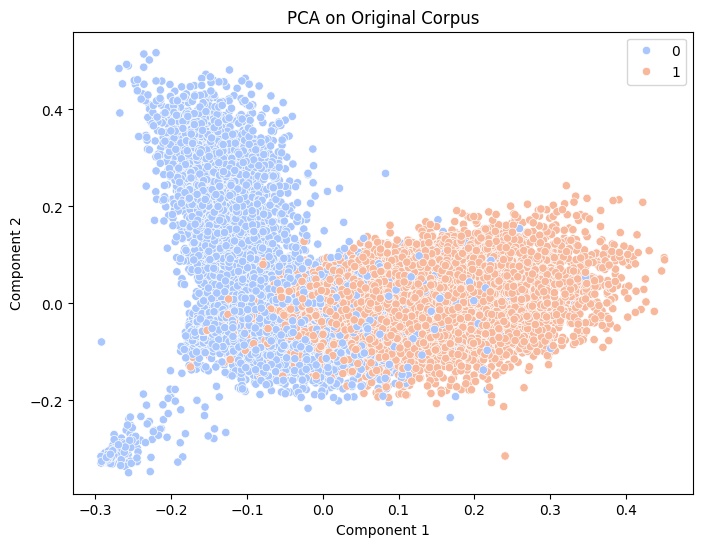

Explained variance for LSA on Original Corpus: [0.01394209 0.00992006]


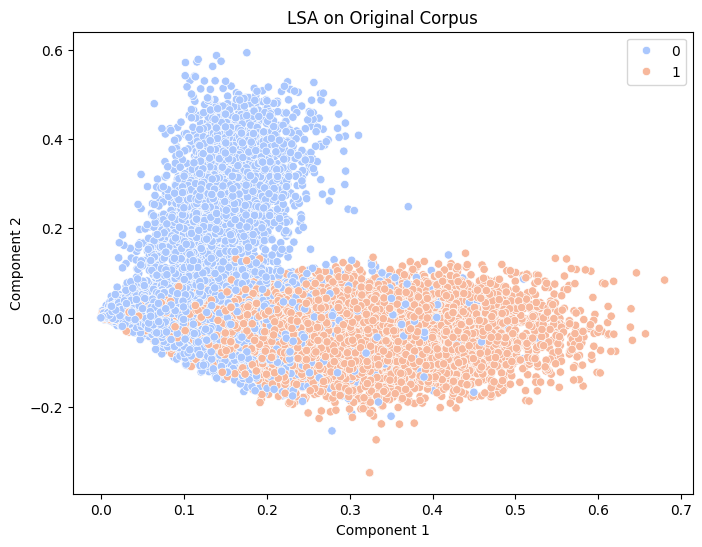

Explained variance for Sparse PCA on Original Corpus: None (Sparse PCA does not return explained variance)


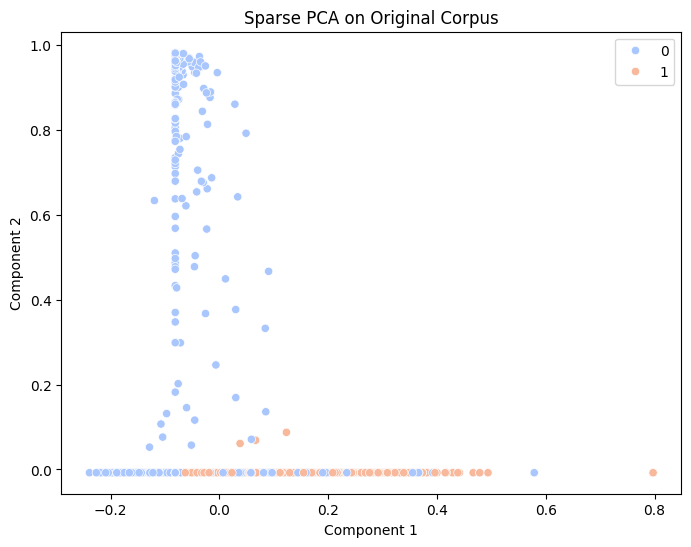


PCA, Sparse PCA, and LSA comparison on Cleaned Corpus
Explained variance for PCA on Cleaned Corpus: [0.01652381 0.00855328]


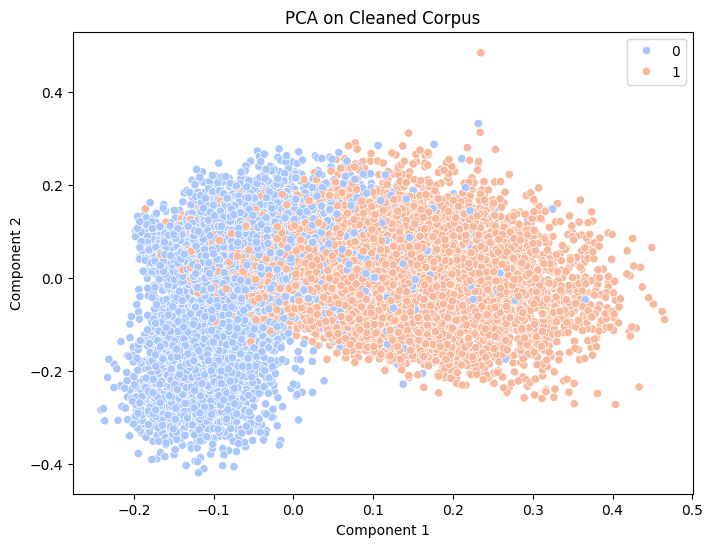

Explained variance for LSA on Cleaned Corpus: [0.01430386 0.00919404]


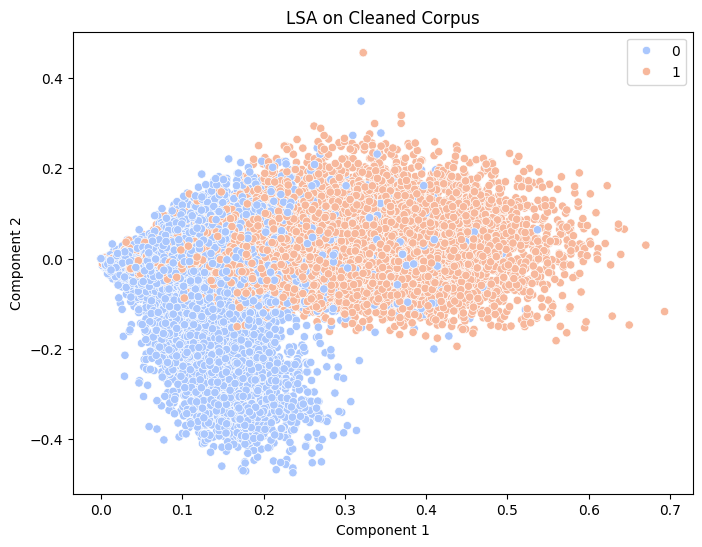

Explained variance for Sparse PCA on Cleaned Corpus: None (Sparse PCA does not return explained variance)


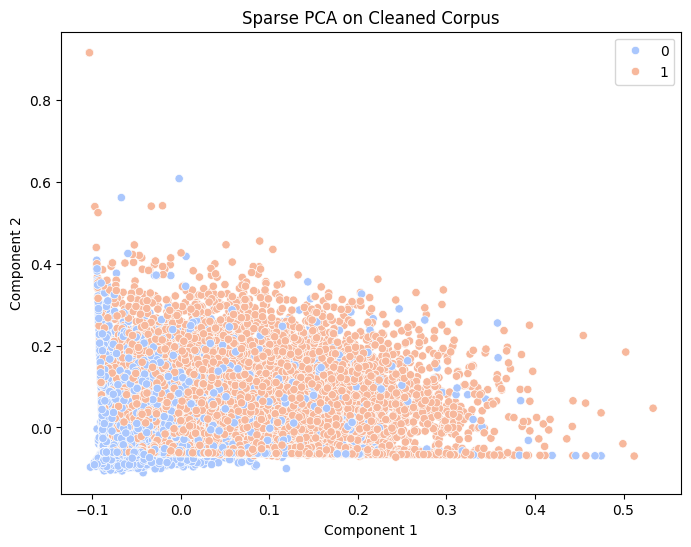

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD, SparsePCA
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

def vectorize_and_reduce(corpus, method='PCA', n_components=2):
    X = corpus['text']
    y = corpus['label']

    # Vectorize the text data using TF-IDF
    vectorizer = TfidfVectorizer(max_features=2500)
    X_tfidf = vectorizer.fit_transform(X).toarray()

    # Apply dimensionality reduction
    if method == 'PCA':
        reducer = PCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X_tfidf)
        explained_variance = reducer.explained_variance_ratio_
    elif method == 'LSA':
        reducer = TruncatedSVD(n_components=n_components)
        X_reduced = reducer.fit_transform(X_tfidf)
        explained_variance = reducer.explained_variance_ratio_
    elif method == 'SparsePCA':
        reducer = SparsePCA(n_components=n_components)
        X_reduced = reducer.fit_transform(X_tfidf)
        explained_variance = None  # SparsePCA does not provide explained variance ratio

    return X_reduced, y, explained_variance

def plot_reduced_data(X_reduced, y, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='coolwarm')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(loc='best')
    plt.show()

def compare_pca_lsa(corpus, corpus_name):
    # PCA on the corpus
    X_pca, y, pca_explained = vectorize_and_reduce(corpus, method='PCA')
    print(f'Explained variance for PCA on {corpus_name} Corpus: {pca_explained}')
    plot_reduced_data(X_pca, y, f'PCA on {corpus_name} Corpus')

    # LSA on the corpus
    X_lsa, y, lsa_explained = vectorize_and_reduce(corpus, method='LSA')
    print(f'Explained variance for LSA on {corpus_name} Corpus: {lsa_explained}')
    plot_reduced_data(X_lsa, y, f'LSA on {corpus_name} Corpus')

    # Sparse PCA on the corpus
    X_sparse_pca, y, sparse_pca_explained = vectorize_and_reduce(corpus, method='SparsePCA')
    print(f'Explained variance for Sparse PCA on {corpus_name} Corpus: {sparse_pca_explained} (Sparse PCA does not return explained variance)')
    plot_reduced_data(X_sparse_pca, y, f'Sparse PCA on {corpus_name} Corpus')

# Compare PCA, Sparse PCA, and LSA on the original corpus
print("PCA, Sparse PCA, and LSA comparison on Original Corpus")
compare_pca_lsa(org_corpus, "Original")

# Compare PCA, Sparse PCA, and LSA on the cleaned corpus
print("\nPCA, Sparse PCA, and LSA comparison on Cleaned Corpus")
compare_pca_lsa(cln_corpus, "Cleaned")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import SparsePCA
import numpy as np

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

def pca_variance_explained(corpus, corpus_name):
    X = corpus['text']

    # Vectorize the text data using TF-IDF with max features of 2500
    vectorizer = TfidfVectorizer(max_features=15000)
    X_tfidf = vectorizer.fit_transform(X)

    # Apply PCA
    pca = SparsePCA()
    pca.fit(X_tfidf.toarray())  # Convert sparse matrix to dense

    # Calculate the cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    # Determine the number of components needed to keep at least 80% variance
    n_components = np.argmax(cumulative_variance >= 0.80) + 1

    print(f"\nNumber of components to retain at least 80% variance in {corpus_name} Corpus: {n_components}")

# Perform PCA on the original corpus
pca_variance_explained(org_corpus, "Original")

# Perform PCA on the cleaned corpus
pca_variance_explained(cln_corpus, "Cleaned")

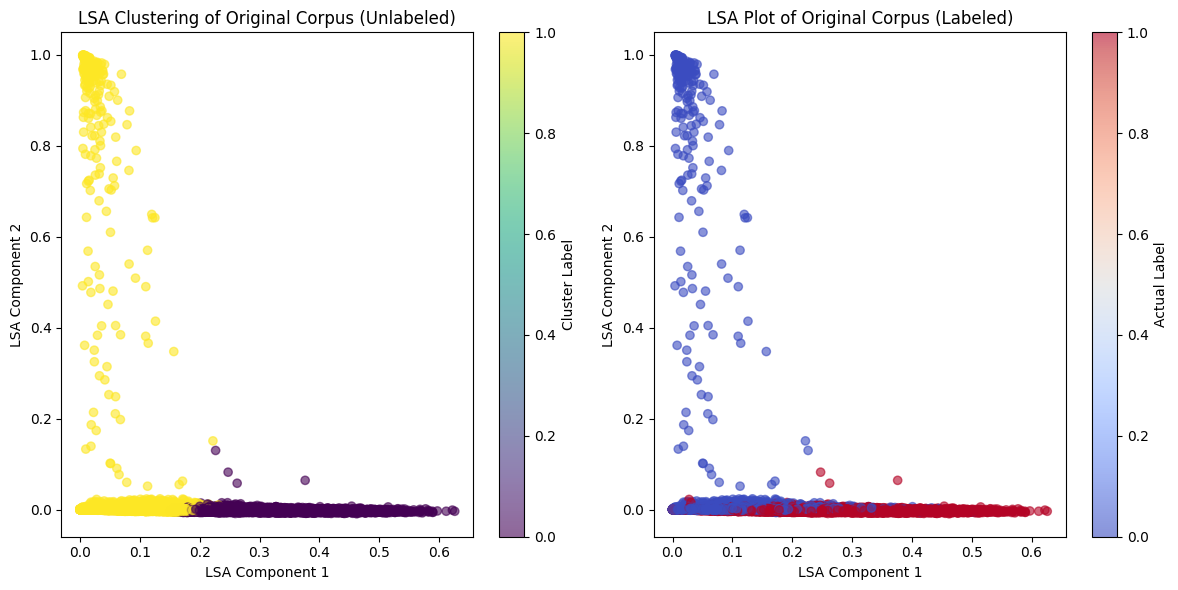

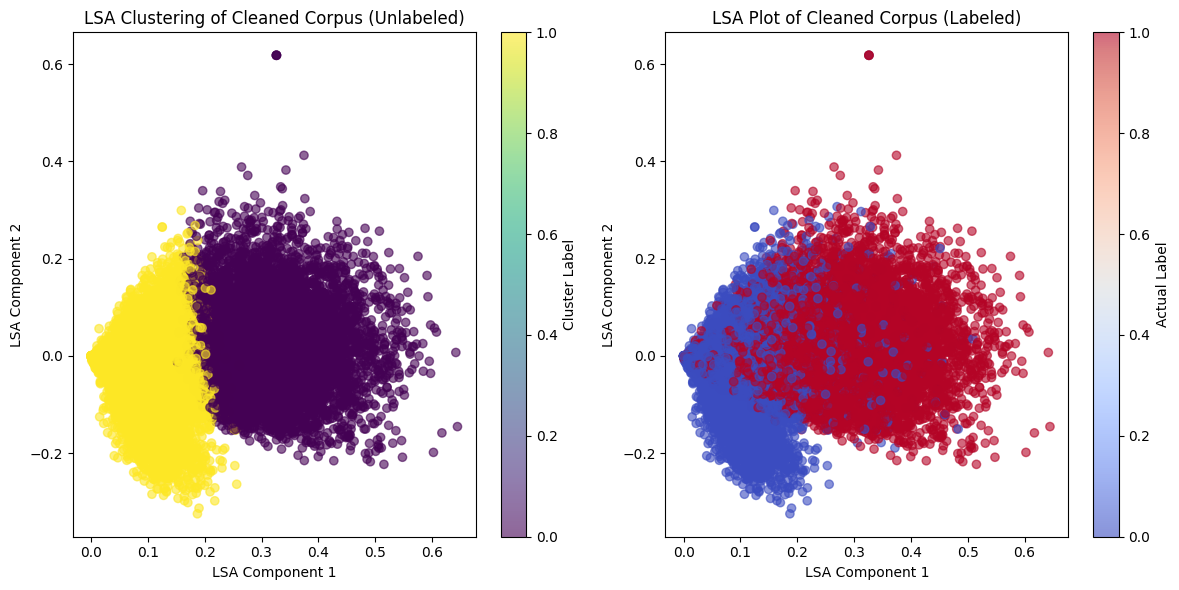

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

def perform_clustering_and_lsa(corpus, corpus_name):
    # Vectorize the text data using TF-IDF with max features of 2500
    vectorizer = TfidfVectorizer(max_features=15000)
    X_tfidf = vectorizer.fit_transform(corpus['text'])

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters
    cluster_labels = kmeans.fit_predict(X_tfidf)

    # Apply LSA using Truncated SVD
    lsa = TruncatedSVD(n_components=2, random_state=42)
    X_lsa = lsa.fit_transform(X_tfidf)

    # Plotting the clusters without labels
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # First plot for clusters
    scatter = plt.scatter(X_lsa[:, 0], X_lsa[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    plt.title(f'LSA Clustering of {corpus_name} Corpus (Unlabeled)')
    plt.xlabel('LSA Component 1')
    plt.ylabel('LSA Component 2')
    plt.colorbar(scatter, label='Cluster Label')

    # Plotting the data with actual labels
    plt.subplot(1, 2, 2)  # Second plot for labels
    scatter_labels = plt.scatter(X_lsa[:, 0], X_lsa[:, 1], c=corpus['label'], cmap='coolwarm', alpha=0.6)
    plt.title(f'LSA Plot of {corpus_name} Corpus (Labeled)')
    plt.xlabel('LSA Component 1')
    plt.ylabel('LSA Component 2')
    plt.colorbar(scatter_labels, label='Actual Label')

    plt.tight_layout()
    plt.show()

# Perform clustering and LSA on the original corpus
perform_clustering_and_lsa(org_corpus, "Original")

# Perform clustering and LSA on the cleaned corpus
perform_clustering_and_lsa(cln_corpus, "Cleaned")

Number of clusters found: 12
Cluster -1 has 27652 samples.
Cluster 0 has 186 samples.
Samples from Cluster 0: ['downvote post wanna know many downvotes get please filler filler filler filler filler filler filler', 'im intelligent got condoms put dildo clean poop filler filler filler filler filler filler filler filler filler filler filler', 'might total idiot exactly pogger filler filler filler filler filler filler filler']

Cluster 2 has 72 samples.
Samples from Cluster 2: ['rick roll httpswwwyoutubecomwatchvnmlkiashttpswwwyoutubecomwatchvnmlkias', 'ultimate ninja warrior httpswwwyoutubecomwatchvxxvocdsampab_channeldevelopedpondhttpswwwyoutubecomwatchvxxvocdsampab_channeldevelopedpond', 'burger patty cos meat buns']

Cluster 3 has 12 samples.
Samples from Cluster 3: ['choccy milk ampxb httpspreviewredditkcrtvijnjpgwidthampformatpjpgampautowebpampsfdaeedcafcaaabc', 'roses red violets blue ampxb ampxb ampxb ampxb ampxb ampxb ampxb ampxb ampxb ampxb ampxb ampxb ampxb scrolled see rest pos

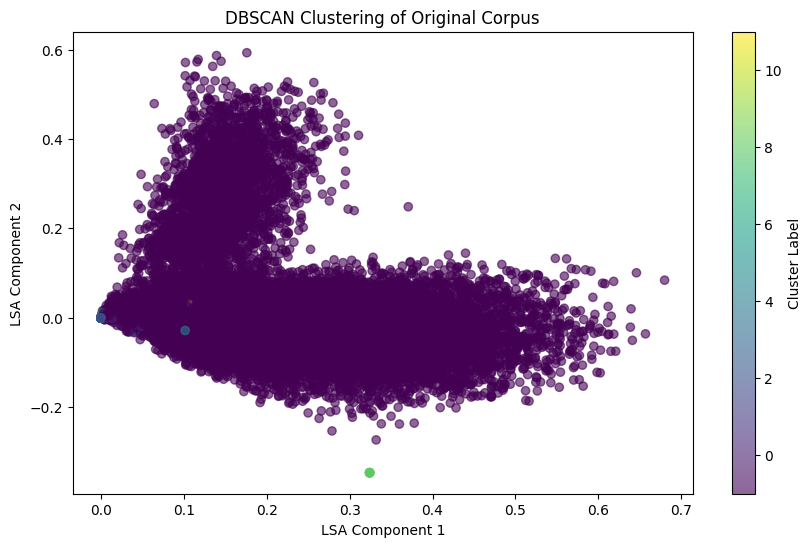

Number of clusters found: 11
Cluster -1 has 27831 samples.
Cluster 4 has 42 samples.
Samples from Cluster 4: ['ultimate ninja warrior', 'choccy milk', 'como una como una']

Cluster 3 has 9 samples.
Samples from Cluster 3: ['man woman body born text text text text text', 'thigh thicc tho text text text text text', 'tell replace plastic bag bottle also motivate answer text text text text text text filer give nude']

Cluster 5 has 9 samples.
Samples from Cluster 5: ['fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock fuck brice maddock

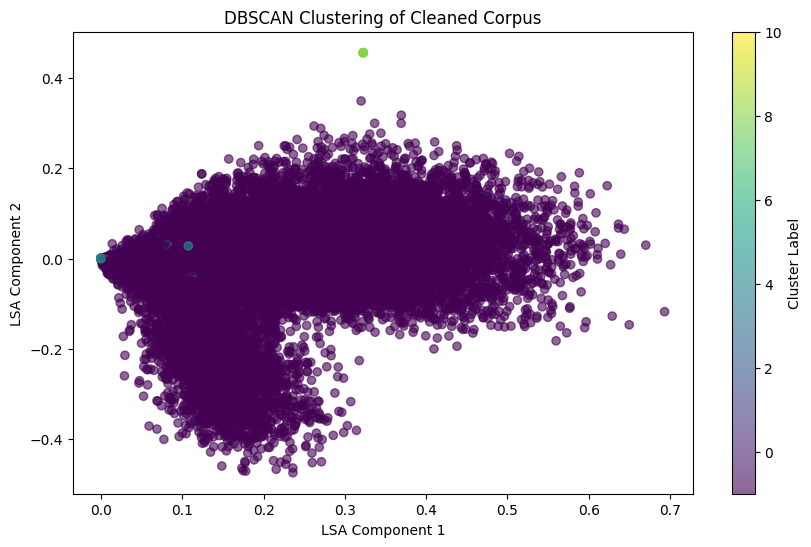

In [9]:
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

def perform_dbscan_and_plot(corpus, corpus_name):
    # Vectorize the text data using TF-IDF with max features of 2500
    vectorizer = TfidfVectorizer(max_features=2500)
    X_tfidf = vectorizer.fit_transform(corpus['text'])

    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
    cluster_labels = dbscan.fit_predict(X_tfidf)

    # Print the number of clusters found (excluding noise)
    unique_labels = set(cluster_labels)
    num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise
    print(f"Number of clusters found: {num_clusters}")

    # Count samples in each cluster
    cluster_counts = pd.Series(cluster_labels).value_counts()
    for cluster_id in cluster_counts.index:
        print(f"Cluster {cluster_id} has {cluster_counts[cluster_id]} samples.")
        # Print the first 3 samples from the cluster if it's not noise (-1)
        if cluster_id != -1:
            samples = corpus[cluster_labels == cluster_id]['text'].head(3).tolist()
            print(f"Samples from Cluster {cluster_id}: {samples}\n")

    # Apply LSA using Truncated SVD
    lsa = TruncatedSVD(n_components=2, random_state=42)
    X_lsa = lsa.fit_transform(X_tfidf)

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_lsa[:, 0], X_lsa[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    plt.title(f'DBSCAN Clustering of {corpus_name} Corpus')
    plt.xlabel('LSA Component 1')
    plt.ylabel('LSA Component 2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

# Perform DBSCAN clustering and LSA on the original corpus
perform_dbscan_and_plot(org_corpus, "Original")

# Perform DBSCAN clustering and LSA on the cleaned corpus
perform_dbscan_and_plot(cln_corpus, "Cleaned")

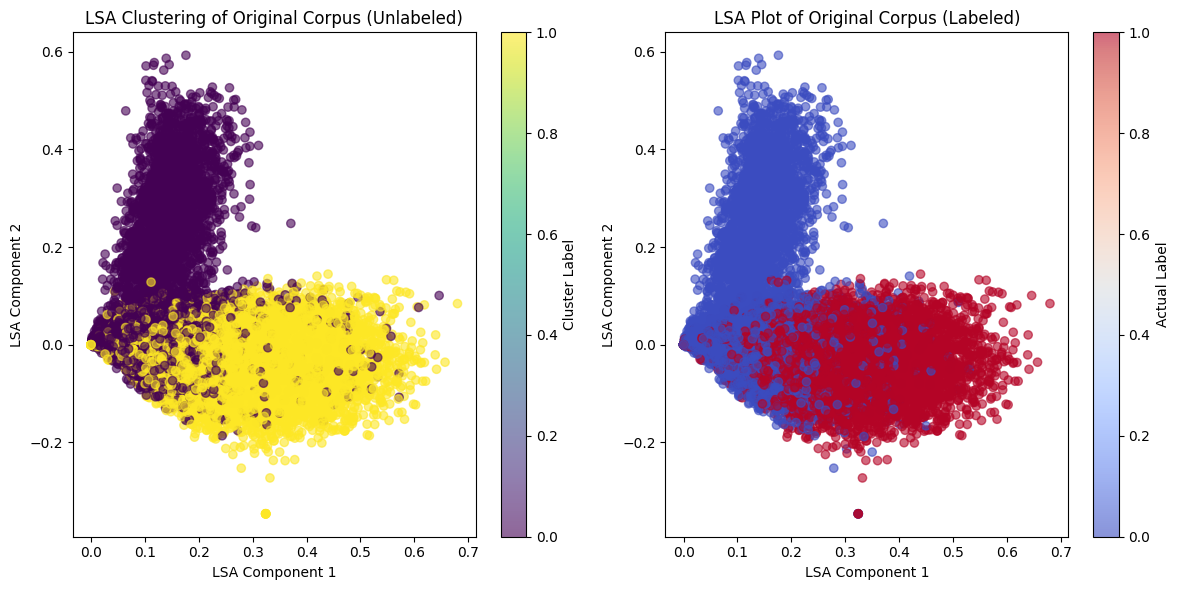

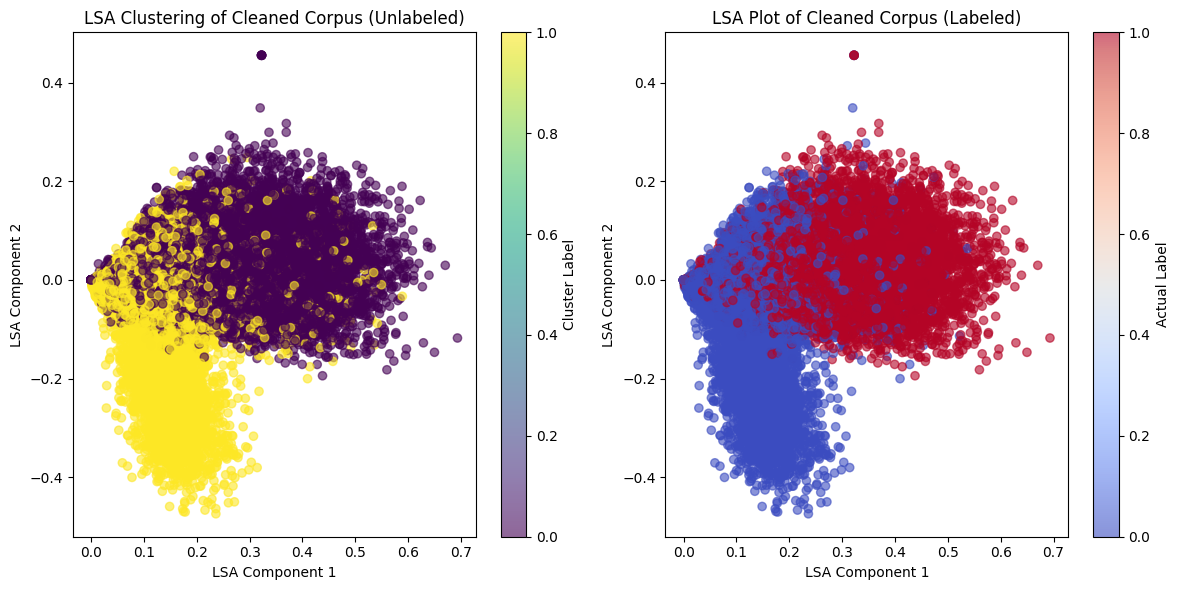

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

def perform_clustering_and_lsa(corpus, corpus_name):
    # Vectorize the text data using TF-IDF with max features of 2500, 15000 takes more than 15 minutes with GMM
    vectorizer = TfidfVectorizer(max_features=2500)
    X_tfidf = vectorizer.fit_transform(corpus['text'])

    # Perform GMM clustering
    gmm = GaussianMixture(n_components=2, random_state=42)  # You can adjust the number of components
    cluster_labels = gmm.fit_predict(X_tfidf.toarray())  # Convert sparse matrix to array for GMM

    # Apply LSA using Truncated SVD
    lsa = TruncatedSVD(n_components=2, random_state=42)
    X_lsa = lsa.fit_transform(X_tfidf)

    # Plotting the clusters without labels
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # First plot for clusters
    scatter = plt.scatter(X_lsa[:, 0], X_lsa[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    plt.title(f'LSA Clustering of {corpus_name} Corpus (Unlabeled)')
    plt.xlabel('LSA Component 1')
    plt.ylabel('LSA Component 2')
    plt.colorbar(scatter, label='Cluster Label')

    # Plotting the data with actual labels
    plt.subplot(1, 2, 2)  # Second plot for labels
    scatter_labels = plt.scatter(X_lsa[:, 0], X_lsa[:, 1], c=corpus['label'], cmap='coolwarm', alpha=0.6)
    plt.title(f'LSA Plot of {corpus_name} Corpus (Labeled)')
    plt.xlabel('LSA Component 1')
    plt.ylabel('LSA Component 2')
    plt.colorbar(scatter_labels, label='Actual Label')

    plt.tight_layout()
    plt.show()

# Perform clustering and LSA on the original corpus
perform_clustering_and_lsa(org_corpus, "Original")

# Perform clustering and LSA on the cleaned corpus
perform_clustering_and_lsa(cln_corpus, "Cleaned")